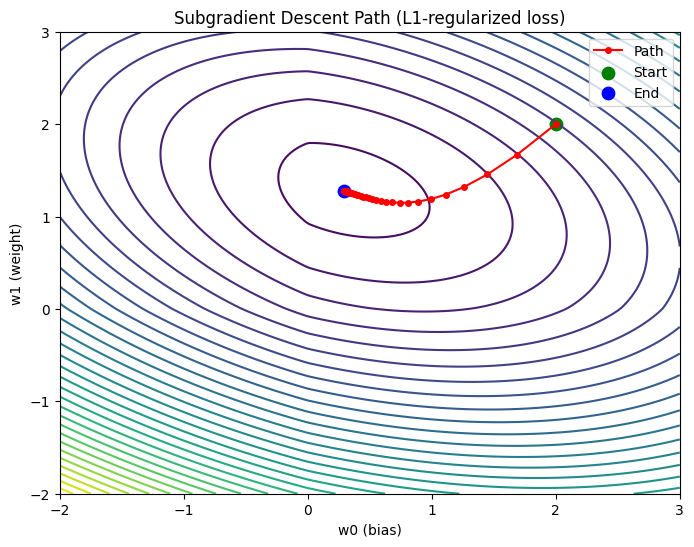

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.array([[1, 1.5], [1, -0.5], [1, 2.0], [1, -1.0]])  
y = np.array([2.0, 0.0, 3.5, -1.0])

def loss(w, lam=0.1):
    mse = np.mean((y - X.dot(w)) ** 2) / 2
    reg = lam * np.sum(np.abs(w))
    return mse + reg

def subgradient(w, lam=0.1):
    grad = -X.T.dot(y - X.dot(w)) / len(y)
    subgrad = lam * np.sign(w)
    return grad + subgrad

def subgradient_descent(lr=0.1, lam=0.1, max_iter=50):
    w = np.array([2.0, 2.0])
    trajectory = [w.copy()]
    for _ in range(max_iter):
        g = subgradient(w, lam)
        w -= lr * g
        trajectory.append(w.copy())
    return np.array(trajectory)

traj = subgradient_descent(lr=0.15, lam=0.2, max_iter=40)

w0 = np.linspace(-2, 3, 200)
w1 = np.linspace(-2, 3, 200)
W0, W1 = np.meshgrid(w0, w1)
Z = np.zeros_like(W0)

for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        Z[i, j] = loss(np.array([W0[i, j], W1[i, j]]), lam=0.2)

plt.figure(figsize=(8, 6))
contours = plt.contour(W0, W1, Z, levels=30)
plt.plot(traj[:, 0], traj[:, 1], 'o-', color='red', markersize=4, label='Path')
plt.scatter(traj[0, 0], traj[0, 1], c='green', s=80, label='Start')
plt.scatter(traj[-1, 0], traj[-1, 1], c='blue', s=80, label='End')
plt.title("Subgradient Descent Path (L1-regularized loss)")
plt.xlabel("w0 (bias)")
plt.ylabel("w1 (weight)")
plt.legend()
plt.show()


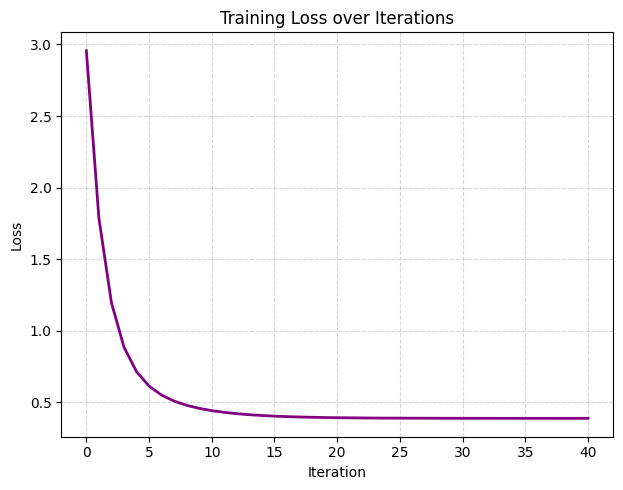

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.array([[1, 1.5], [1, -0.5], [1, 2.0], [1, -1.0]]) 
y = np.array([2.0, 0.0, 3.5, -1.0])

def loss(w, lam=0.1):
    mse = np.mean((y - X.dot(w)) ** 2) / 2
    reg = lam * np.sum(np.abs(w))
    return mse + reg

def subgradient(w, lam=0.1):
    grad = -X.T.dot(y - X.dot(w)) / len(y)
    subgrad = lam * np.sign(w)
    return grad + subgrad


def subgradient_descent(lr=0.1, lam=0.1, max_iter=50):
    w = np.array([2.0, 2.0])  # start point
    trajectory = [w.copy()]
    losses = [loss(w, lam)]
    for _ in range(max_iter):
        g = subgradient(w, lam)
        w -= lr * g
        trajectory.append(w.copy())
        losses.append(loss(w, lam))
    return np.array(trajectory), np.array(losses)


traj, losses = subgradient_descent(lr=0.15, lam=0.2, max_iter=40)

w0 = np.linspace(-2, 3, 200)
w1 = np.linspace(-2, 3, 200)
W0, W1 = np.meshgrid(w0, w1)
Z = np.zeros_like(W0)

for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        Z[i, j] = loss(np.array([W0[i, j], W1[i, j]]), lam=0.2)


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 2)
plt.plot(losses, color='purple', linewidth=2)
plt.title("Training Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


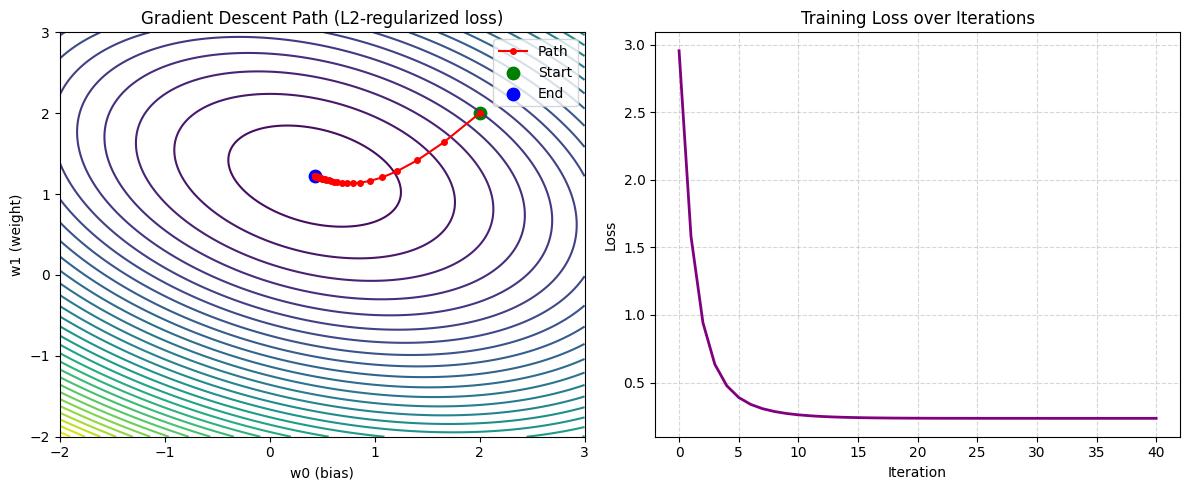

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.array([[1, 1.5], [1, -0.5], [1, 2.0], [1, -1.0]])  
y = np.array([2.0, 0.0, 3.5, -1.0])

def loss(w, lam=0.1):
    mse = np.mean((y - X.dot(w)) ** 2) / 2
    reg = (lam / 2) * np.sum(w ** 2)  
    return mse + reg

def gradient(w, lam=0.1):
    grad_mse = -X.T.dot(y - X.dot(w)) / len(y)
    grad_reg = lam * w
    return grad_mse + grad_reg

def gradient_descent(lr=0.1, lam=0.1, max_iter=50):
    w = np.array([2.0, 2.0]) 
    trajectory = [w.copy()]
    losses = [loss(w, lam)]
    for _ in range(max_iter):
        g = gradient(w, lam)
        w -= lr * g
        trajectory.append(w.copy())
        losses.append(loss(w, lam))
    return np.array(trajectory), np.array(losses)

traj, losses = gradient_descent(lr=0.15, lam=0.2, max_iter=40)

w0 = np.linspace(-2, 3, 200)
w1 = np.linspace(-2, 3, 200)
W0, W1 = np.meshgrid(w0, w1)
Z = np.zeros_like(W0)

for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        Z[i, j] = loss(np.array([W0[i, j], W1[i, j]]), lam=0.2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
contours = plt.contour(W0, W1, Z, levels=30)
plt.plot(traj[:, 0], traj[:, 1], 'o-', color='red', markersize=4, label='Path')
plt.scatter(traj[0, 0], traj[0, 1], c='green', s=80, label='Start')
plt.scatter(traj[-1, 0], traj[-1, 1], c='blue', s=80, label='End')
plt.title("Gradient Descent Path (L2-regularized loss)")
plt.xlabel("w0 (bias)")
plt.ylabel("w1 (weight)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(losses, color='purple', linewidth=2)
plt.title("Training Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
